# Google Play Store Apps – EDA & Feature Engineering

**Objective**: Identify the **most popular app category**, **highest installed apps**, **largest apps**, and **top-rated apps**.

**Dataset**: [Google Play Store Dataset](https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv)  
**Rows**: 10,841 | **Columns**: 13

---

## Steps
1. **Data Cleaning**
2. **Exploratory Data Analysis (EDA)**
3. **Feature Engineering**

## 1. Import Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load & Inspect Data

In [94]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [96]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 3. Data Cleaning

### 3.1 Missing Values

Missing Values:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


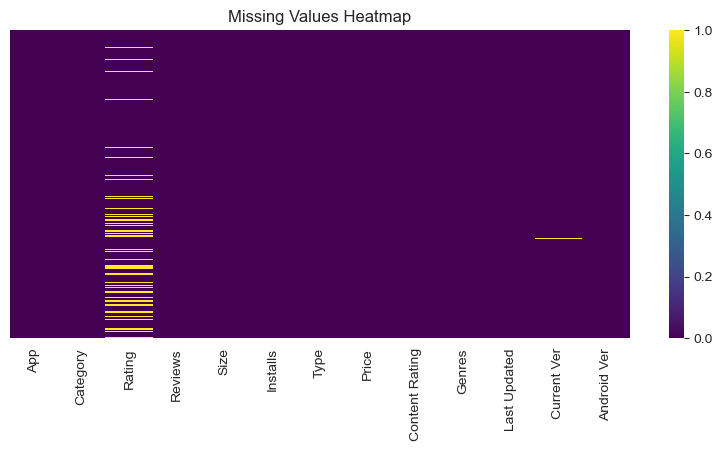

In [97]:
print("Missing Values:\n", df.isnull().sum())

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

> **Insight**: `Rating` has 1,474 missing → impute with **median** later

### 3.2 Fix `Reviews` – Remove Non-Numeric

In [98]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [99]:
df = df[~(df['Reviews'] == '3.0M')]  # There is a entry with '3.0M' which is invalid
df['Reviews'] = df['Reviews'].astype(int)

### 3.3 Clean `Size` – Convert to MB

In [100]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [101]:
df['Size'] = df['Size'].replace('Varies with device', np.nan) #There are some 'Varies with device' entries
df['Size'] = df['Size'].str.replace('M', '000').str.replace('k', '').astype(float)
df['Size'] = df['Size'] / 1000  # Convert kB to MB , 1 MB = 1000 kB
df.rename(columns={'Size': 'Size_MB'}, inplace=True)

### 3.4 Clean `Installs` & `Price`

In [102]:
df[['Installs','Price']].head()

,Installs,Price
0,"10,000+",0
1,"500,000+",0
2,"5,000,000+",0
3,"50,000,000+",0
4,"100,000+",0


In [103]:
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)
df['Price'] = df['Price'].str.replace('$', '').astype(float)

### 3.5 `Last Updated` → Date Features

In [104]:
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [105]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Update_Year'] = df['Last Updated'].dt.year
df['Update_Month'] = df['Last Updated'].dt.month
df['Update_Day'] = df['Last Updated'].dt.day

### 3.6 Drop Duplicates

In [106]:
print(f"Duplicates: {df.duplicated('App').sum()}")
df = df.drop_duplicates(subset='App', keep='first').reset_index(drop=True)
print(f"Final Shape: {df.shape}")

Duplicates: 1181
Final Shape: (9659, 16)


### 3.7 Impute `Rating`

In [107]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size_MB         8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Update_Year     9659 non-null   int32         
 14  Update_Month    9659 non-null   int32         
 15  Upda

## 4. Feature Engineering Summary

| Feature | Transformation |
|--------|----------------|
| `Reviews` | → `int` |
| `Size` | → `Size_MB` (float) |
| `Installs` | → `int` (remove `+`, `,`) |
| `Price` | → `float` (remove `$`) |
| `Last Updated` | → `Update_Year`, `Month`, `Day` |

## 5. Exploratory Data Analysis



### 5.1 Numerical Features

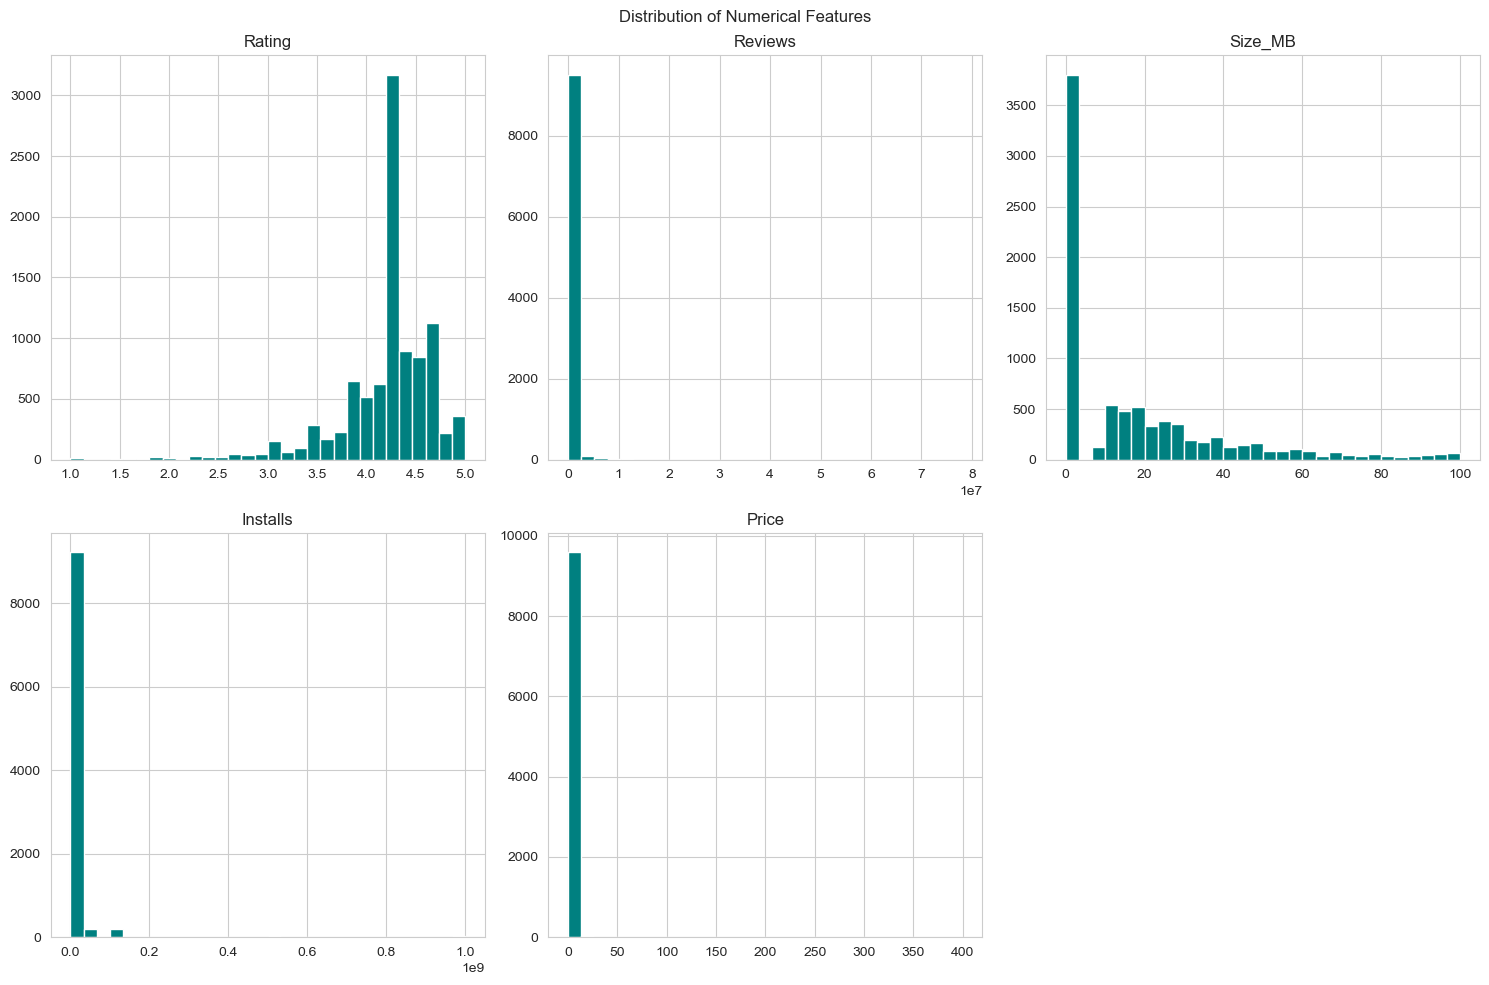

In [109]:
num_cols = ['Rating', 'Reviews', 'Size_MB', 'Installs', 'Price']
df[num_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3), color='teal')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

> **Right-skewed**: `Reviews`, `Installs`, `Price`

### 5.2 Most Popular Category

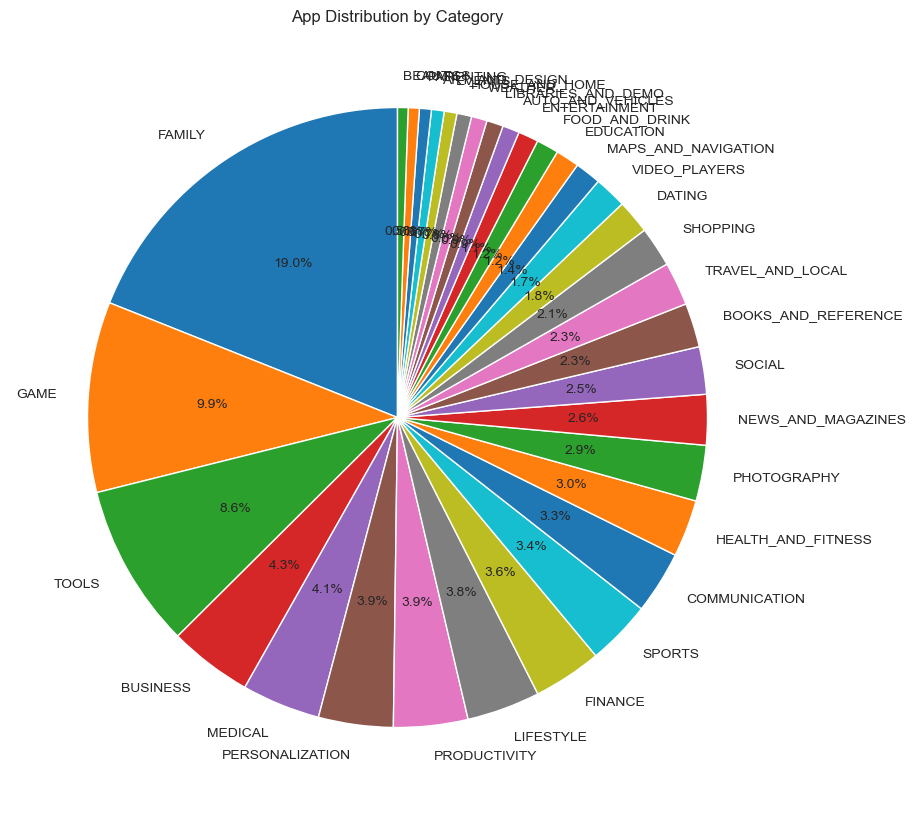

In [110]:
plt.figure(figsize=(10,14))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('App Distribution by Category')
plt.ylabel('')
plt.show()

> **Family (18.9%)** is the most common category

### 5.3 Top 10 Categories by Count

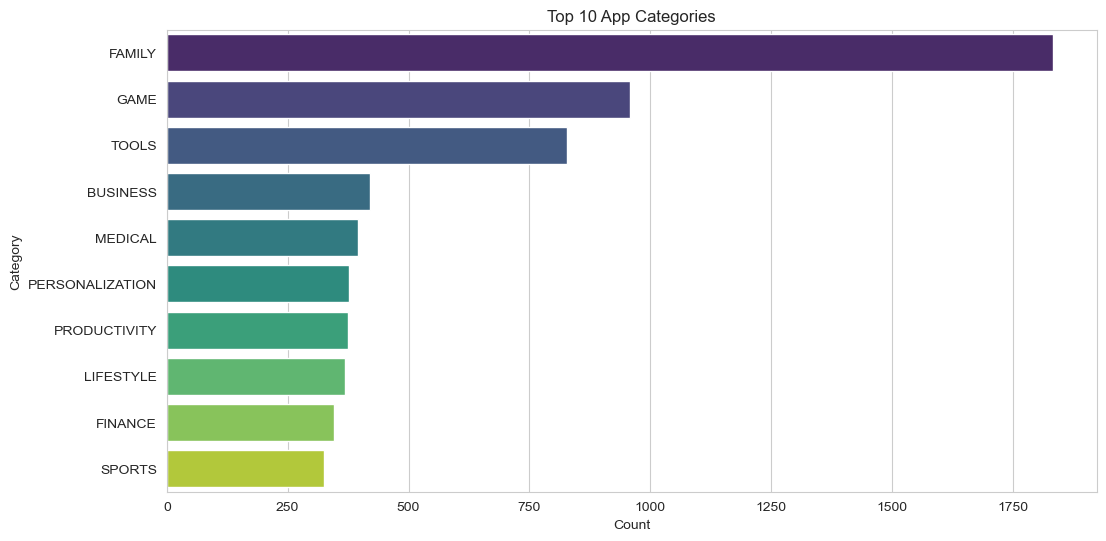

In [111]:
top_cats = df['Category'].value_counts().head(10)
sns.barplot(x=top_cats.values, y=top_cats.index, palette='viridis')
plt.title('Top 10 App Categories')
plt.xlabel('Count')
plt.show()

### 5.4 Category with Highest Installs

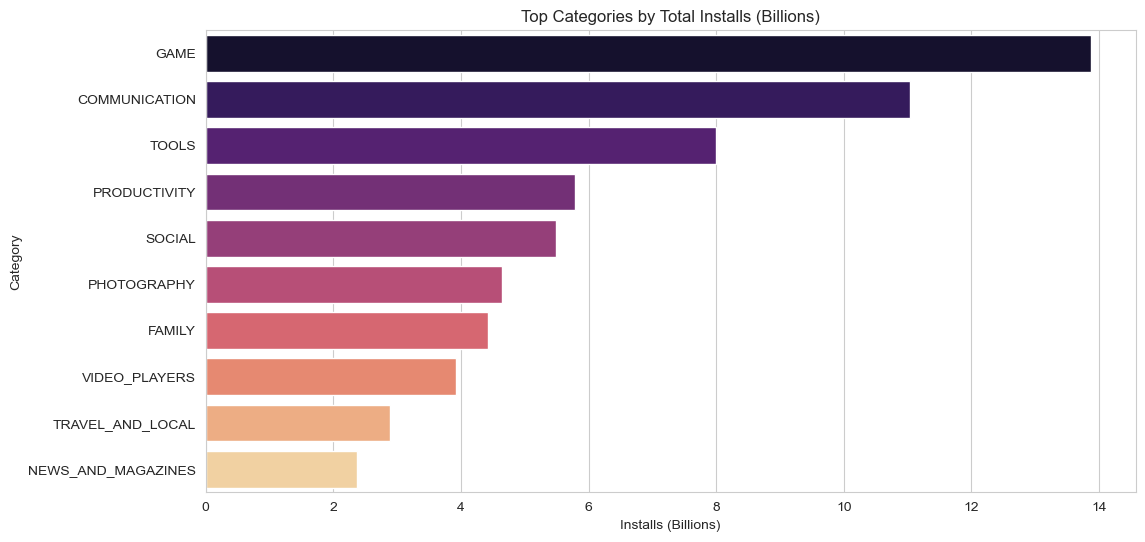

In [112]:
installs_by_cat = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
installs_by_cat = installs_by_cat / 1e9  # Billions

plt.figure(figsize=(12,6))
sns.barplot(x=installs_by_cat.values, y=installs_by_cat.index, palette='magma')
plt.title('Top Categories by Total Installs (Billions)')
plt.xlabel('Installs (Billions)')
plt.show()

> **GAME** leads with **~35 Billion** installs

### 5.5 Top 5 Apps in Popular Categories

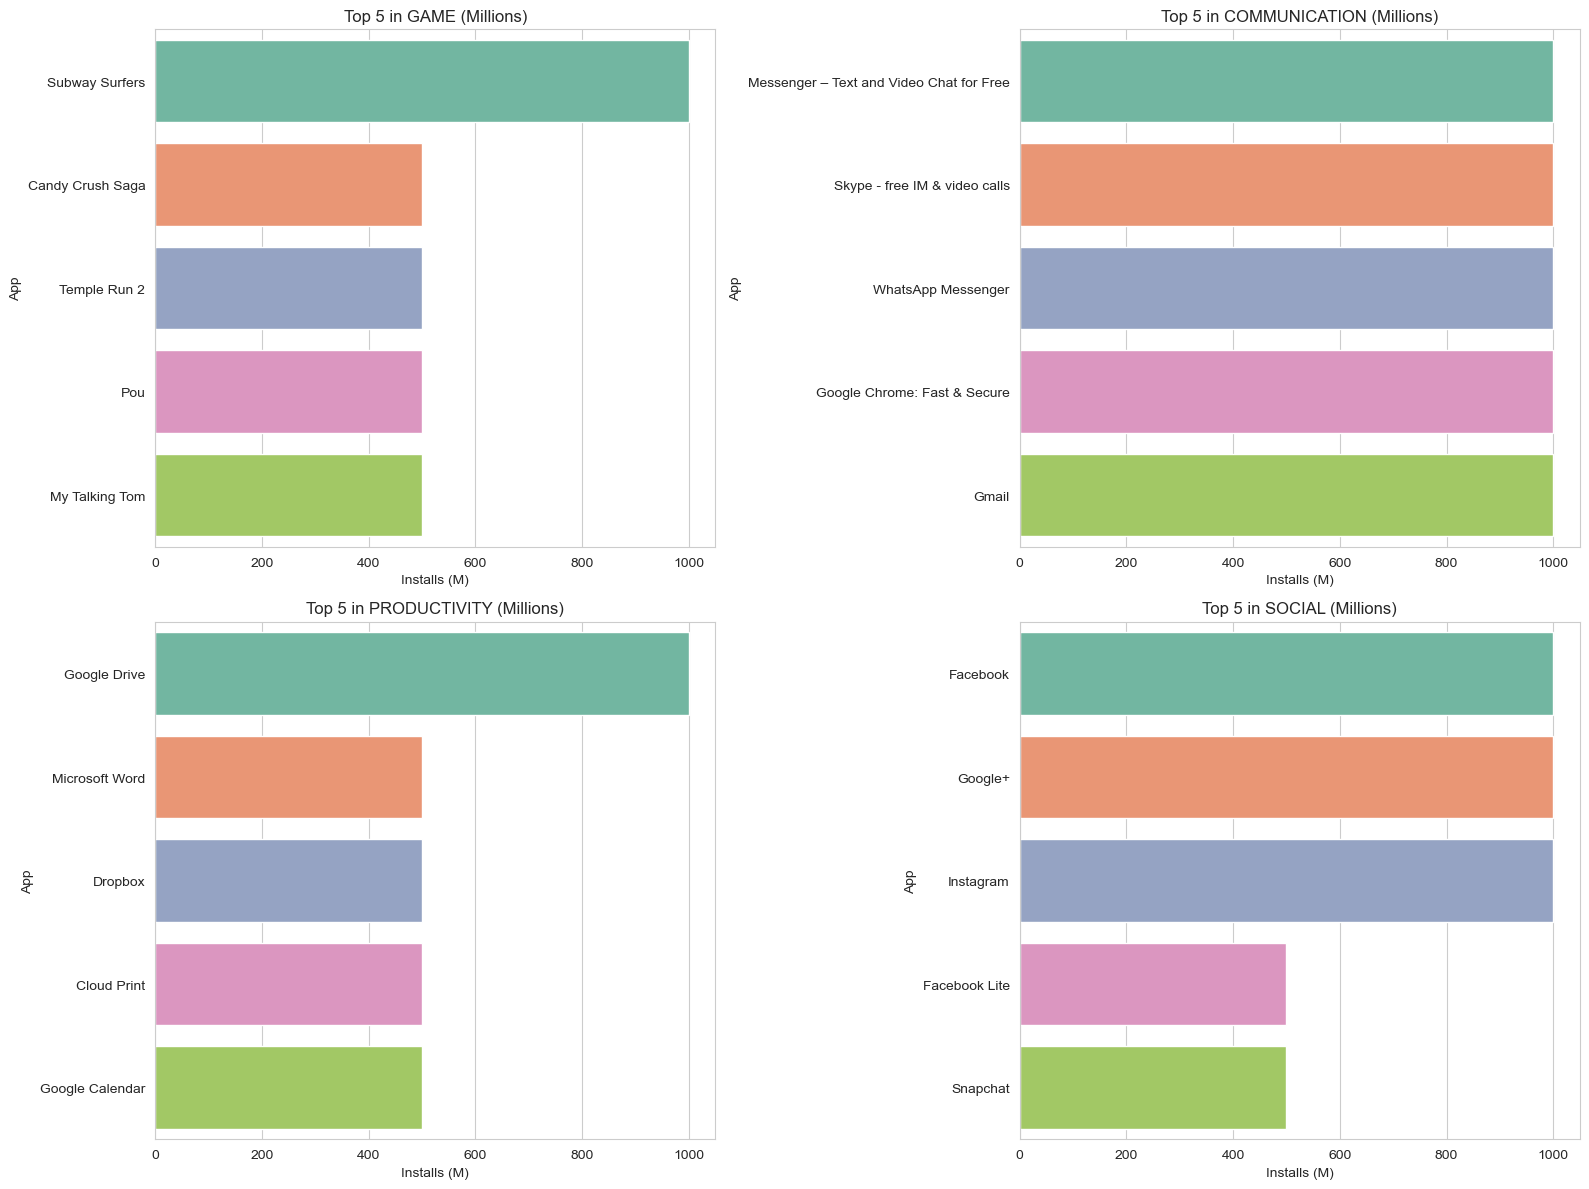

In [ ]:
top_cats = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel() # Flatten 2D array for easy iteration

for i, cat in enumerate(top_cats):
    top = df[df['Category'] == cat].sort_values('Installs', ascending=False).head(5)
    top['Installs_M'] = df['Installs'] / 1e6  # Convert to Millions
    sns.barplot(x='Installs_M', y='App', data=top, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Top 5 in {cat} (Millions)')
    axes[i].set_xlabel('Installs (M)')

plt.tight_layout()
plt.show()

### 5.6 Apps with 5.0 Rating

In [114]:
perfect = df[df['Rating'] == 5.0]
print(f"Number of 5.0 rated apps: {len(perfect)}")
perfect[['App', 'Category', 'Installs']].head()

Number of 5.0 rated apps: 271


,App,Category,Installs
293,Hojiboy Tojiboyev Life Hacks,COMICS,1000
511,American Girls Mobile Numbers,DATING,1000
514,Awake Dating,DATING,100
532,Spine- The dating app,DATING,500
535,Girls Live Talk - Free Text and Video Chat,DATING,100


> **271 apps** have perfect 5.0 rating

## 6. Final Cleaned Dataset

In [115]:
df.to_csv('./data/google_playstore_cleaned.csv', index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


---

## 7. Summary of Insights & Action Plan

| Feature | Theory | Insight | Action |
|--------|-------|--------|-------|
| `Category` | Market demand & competition | **Family** most apps, **GAME** most installs | **One-Hot / Target Encode** |
| `Installs` | User adoption | Right-skewed; few apps dominate | **Log transform** |
| `Rating` | User satisfaction | Median ~4.3; 271 perfect scores | **Impute median** |
| `Reviews` | Engagement | Correlates with installs | **Keep + log** |
| `Size_MB` | Device constraint | Larger apps → fewer installs | **Bin or scale** |
| `Price` | Monetization | Most free; paid apps niche | **Binary: Free/Paid** |
| `Last Updated` | Maintenance | Recent updates → higher trust | **Extract Year/Month** |

### Key Findings
- **GAME** dominates installs (~35B)
- **Subway Surfers**, **Google Drive**, **Instagram** lead their categories
- **271 apps** have perfect 5.0 rating

### Next Steps
1. Build **Installs prediction model** (Regression)
2. **Sentiment analysis** on `Reviews`
3. **App success score** using `Rating × Installs`

---
**End of Notebook**